## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns


## Loading CSV

In [351]:
audit = pd.read_csv('C:/Users/saksh/Downloads/audit_risk.csv')
trail = pd.read_csv('C:/Users/saksh/Downloads/trial.csv')

## Dropping the Common Columns in the second data frame 

In [352]:
trail = trail.drop(['Sector_score','LOCATION_ID','PARA_A', 'PARA_B','TOTAL', 'numbers','Money_Value','History','Score','Risk'],axis=1)

## Merging the  two CSVs

In [353]:
merged = pd.concat([audit,trail], axis =1)

In [354]:
merged.replace(['SAFIDON', 'LOHARU', 'NUH'], [45,46,47],inplace=True)

In [355]:
merged.LOCATION_ID = pd.to_numeric(merged.LOCATION_ID)

In [356]:
merged = merged.dropna()

In [357]:
merged.shape

(775, 35)

In [358]:
merged.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'SCORE_A', 'SCORE_B', 'Marks',
       'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 'History_score'],
      dtype='object')

## Drop Highly Correlated Features

### Identify Highly Correlated Features, i.e correlation greater than 0.95

In [359]:
# Create correlation matrix
corr_matrix = merged.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

#list of columns to be dropped
print(to_drop)


['Risk_A', 'Risk_B', 'TOTAL', 'Risk_C', 'Risk_D', 'Risk_F', 'SCORE_A', 'SCORE_B', 'Marks', 'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 'History_score']


### Drop Marked Features

In [360]:
# Drop features 
merged=merged.drop(to_drop, axis=1)

In [361]:
merged.shape

(775, 21)

In [362]:
merged.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'numbers', 'Score_B.1', 'Money_Value', 'Score_MV', 'District_Loss',
       'PROB', 'RiSk_E', 'History', 'Prob', 'Score', 'Inherent_Risk',
       'CONTROL_RISK', 'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

## Removing Risk column for Regression task

In [363]:
X = merged.drop(['Audit_Risk','Risk'],axis=1)
y = merged.Audit_Risk

In [364]:
X.shape

(775, 19)

In [365]:
y.shape 

(775,)

In [366]:
X.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'numbers', 'Score_B.1', 'Money_Value', 'Score_MV', 'District_Loss',
       'PROB', 'RiSk_E', 'History', 'Prob', 'Score', 'Inherent_Risk',
       'CONTROL_RISK', 'Detection_Risk'],
      dtype='object')

## Test Train Split

In [367]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

## Using MinMaxScaler to scale the data
### Min Max scaler is helpful to fit the within a certain range i.e 0 to 1 in this case 
#### In our dataset we have outliers and as standard scaler cannot guarantee balanced feature scales in the presence of outliers therefore we chose MinMax scaler, MinMax scaler suppresses the effect of outliers

In [368]:
scaler = MinMaxScaler()

In [369]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 775
Data columns (total 19 columns):
Sector_score      775 non-null float64
LOCATION_ID       775 non-null int64
PARA_A            775 non-null float64
Score_A           775 non-null float64
PARA_B            775 non-null float64
Score_B           775 non-null float64
numbers           775 non-null float64
Score_B.1         775 non-null float64
Money_Value       775 non-null float64
Score_MV          775 non-null float64
District_Loss     775 non-null int64
PROB              775 non-null float64
RiSk_E            775 non-null float64
History           775 non-null int64
Prob              775 non-null float64
Score             775 non-null float64
Inherent_Risk     775 non-null float64
CONTROL_RISK      775 non-null float64
Detection_Risk    775 non-null float64
dtypes: float64(16), int64(3)
memory usage: 121.1 KB


In [370]:
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## KNN

In [67]:
knn = KNeighborsRegressor()
k_range = list(range(1,11))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5)

In [68]:
grid.fit(X_train,y_train)

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [69]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'n_neighbors': 2}
Best cross-validation score: 0.69


Text(0, 0.5, 'MSE')

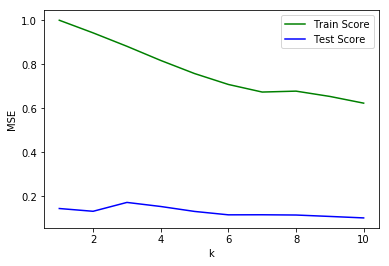

In [70]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,11):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,11)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [71]:
knn = KNeighborsRegressor(2)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9426
Test score: 0.1321


In [72]:
scores = cross_val_score(knn, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.67021528 0.79520073 0.59394035 0.49743952 0.87236235]
Average cross-validation score: 0.69


In [73]:
scores = cross_val_score(knn, X_test, y_test, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.10098149 0.42362149 0.31699349 0.03403047 0.3210615 ]
Average cross-validation score: 0.24


In [74]:
scores = cross_val_score(knn, X_train, y_train, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ -46.89364091  -84.69398021 -232.21231421  -25.19670151  -27.88709244]
Average cross-validation score: -83.38


In [75]:
scores = cross_val_score(knn, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [   -84.00098349   -794.04124236   -268.39279293 -22168.76179263
    -43.69934933]
Average cross-validation score: -4671.78


## Linear Regression

In [76]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.8150791802325007
0.4007675284614799


In [77]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
print(linreg.intercept_)
print(linreg.coef_)

-0.5752828307874349
[ 1.27139325e+00 -6.90521152e-01 -4.29536558e+01  3.40060462e+13
 -8.67356972e+01  1.02018139e+14  2.62680055e+01  6.80120924e+13
 -4.92630568e+02  3.40060462e+13  3.40060462e+13  3.40060462e+13
 -2.95846390e+01 -1.19963317e+02  3.40060462e+13 -2.72048370e+14
  7.41385868e+02  1.20530104e+02  0.00000000e+00]


In [78]:
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

55.32902006855826


In [79]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
scores = cross_val_score(lreg, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))


Cross-validation scores: [ 0.65683889  0.77501071  0.66617775 -1.19500525  0.78211258]
Average cross-validation score: 0.34


In [80]:
scores = cross_val_score(lreg, X_test, y_test, cv=5, scoring='r2')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [-2.01288894  0.57446431  0.50355355  0.40686684 -0.00658706]
Average cross-validation score: -0.11


In [81]:
scores = cross_val_score(lreg, X_train, y_train, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ -48.79569209  -93.0434864  -190.90209387 -110.05022262  -47.60543929]
Average cross-validation score: -98.08


In [82]:
scores = cross_val_score(lreg, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [  -281.51326237   -586.23435653   -195.08254626 -13612.25937094
    -64.7881948 ]
Average cross-validation score: -2947.98


## Ridge Regression

In [83]:
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
         
grid = GridSearchCV(ridge, param_grid, cv=5, return_train_score=True)

In [84]:
grid.fit(X_train, y_train)

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [85]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'alpha': 1}
Best cross-validation score: 0.61


In [86]:
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

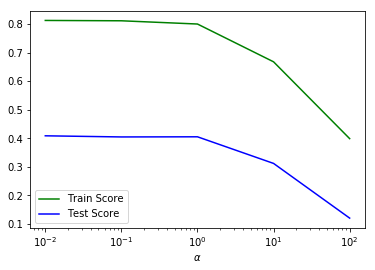

In [87]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

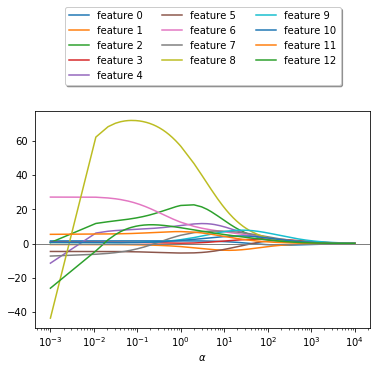

In [88]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [89]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.8008
Test score: 0.4056


In [90]:
ridge = Ridge(alpha=1)
scores = cross_val_score(ridge, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.78169045 0.81034328 0.66583077 0.02462934 0.78592508]
Average cross-validation score: 0.61


In [91]:
scores = cross_val_score(ridge, X_test, y_test, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [-0.15771263  0.53066684  0.74885426  0.42266135 -0.13691027]
Average cross-validation score: 0.28


In [92]:
scores = cross_val_score(ridge, X_train, y_train, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ -31.04246133  -78.43183435 -191.10051971  -48.90182271  -46.77246007]
Average cross-validation score: -79.25


In [93]:
scores = cross_val_score(ridge, X_test, y_test, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [  -108.1724103    -646.57144462    -98.68970022 -13249.7793501
    -73.17634713]
Average cross-validation score: -2835.28


## LASSO

In [94]:
lasso = Lasso(random_state=0)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lasso, param_grid, cv=5, return_train_score=True)

In [95]:
grid.fit(X_train, y_train)

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [96]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.64


In [97]:
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

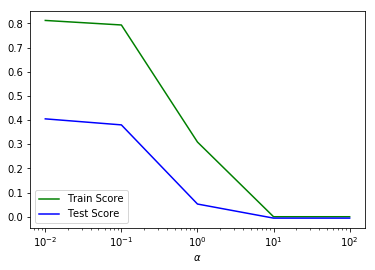

In [98]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


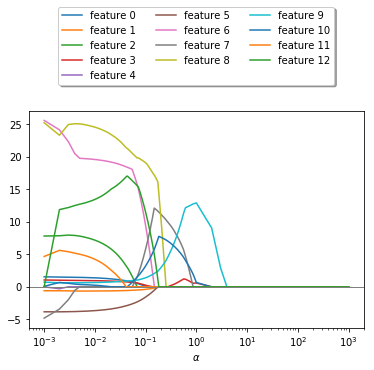

In [99]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [100]:
lasso = Lasso(alpha=0.1)
scores = cross_val_score(lasso, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.77167033 0.78333414 0.6672941  0.18973171 0.76242725]
Average cross-validation score: 0.63


In [101]:
scores = cross_val_score(lasso, X_test, y_test, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [-0.3132884   0.556084    0.66813301  0.37806598 -0.26835874]
Average cross-validation score: 0.20


In [102]:
scores = cross_val_score(lasso, X_train, y_train, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ -32.46726958  -89.60136264 -190.26368901  -40.62414213  -51.90641763]
Average cross-validation score: -80.97


In [103]:
scores = cross_val_score(lasso, X_test, y_test, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [  -122.70883795   -611.55578016   -130.40975011 -14273.23199368
    -81.6369258 ]
Average cross-validation score: -3043.91


## Polynomial Regression

In [104]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(4), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}

poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=10, scoring='neg_mean_squared_error')


In [105]:
poly_grid.fit(X_train, y_train)

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'polynomialfeatures__degree': array([0, 1, 2, 3]), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [106]:
print("Best parameters: {}".format(poly_grid.best_params_))
print("Best cross-validation score: {:.2f}".format(poly_grid.best_score_))

Best parameters: {'linearregression__fit_intercept': True, 'linearregression__normalize': True, 'polynomialfeatures__degree': 2}
Best cross-validation score: -0.79


In [107]:
poly = PolynomialRegression(2)
scores = cross_val_score(poly, X_train, y_train, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.99882324 0.9995858  0.98156395 0.99983575 0.98466706 0.98887234
 0.99999971 0.66470761 0.99243068 0.96744704]
Average cross-validation score: 0.96


In [108]:
scores = cross_val_score(poly, X_test, y_test, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 0.94548327  0.9546916   0.89839254  0.98836272 -4.00537988  0.99770051
  0.88909206  0.95998129  0.99988547  0.77284794]
Average cross-validation score: 0.44


In [109]:
scores = cross_val_score(poly, X_train, y_train, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ -0.29347589  -4.25400197  -9.01723962 -12.40003099  -7.52069859]
Average cross-validation score: -6.70


In [110]:
scores = cross_val_score(poly, X_test, y_test, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [  -7.44558509 -124.11893707  -22.45070266 -508.79023153  -13.58667053]
Average cross-validation score: -135.28


## Support Vector with Kernel Trick

In [111]:
param_grid = {
    'kernel':['rbf','poly'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.01,0.1,1,10]
}
ksvr=SVR()
grid = GridSearchCV(ksvr, param_grid, cv=5,return_train_score=True)

In [112]:
grid.fit(X_train, y_train)

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['rbf', 'poly'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [113]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'C': 100, 'gamma': 1, 'kernel': 'poly'}
Best cross-validation score: 0.96


In [114]:
svr = SVR(C=100, gamma=1, kernel= 'poly')
scores = cross_val_score(svr, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.96561412 0.9892796  0.93331783 0.92656547 0.98620517]
Average cross-validation score: 0.96


In [115]:
scores = cross_val_score(svr, X_test, y_test, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))


Cross-validation scores: [0.84689257 0.7487288  0.88600317 0.6640667  0.78762248]
Average cross-validation score: 0.79


In [116]:
scores = cross_val_score(svr, X_train, y_train, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ -4.88949042  -4.43338271 -38.13336828  -3.68176159  -3.01398299]
Average cross-validation score: -10.83


In [117]:
scores = cross_val_score(svr, X_test, y_test, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [  -14.30579522  -346.16088781   -44.79595175 -7709.58618179
   -13.66951448]
Average cross-validation score: -1625.70


## Support Vector Regressor

In [118]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
svr=SVR() 

In [119]:
grid = GridSearchCV(svr, param_grid, cv=5,return_train_score=True)

In [120]:
grid.fit(X_train, y_train)

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [121]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.74


In [122]:
svr =SVR(C=100)
scores = cross_val_score(svr, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.87220553 0.73787086 0.54260895 0.85323616 0.71046902]
Average cross-validation score: 0.74


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

In [123]:
scores = cross_val_score(svr, X_test, y_test, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.78385359 0.35607271 0.6317678  0.02464988 0.6046202 ]
Average cross-validation score: 0.48


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

In [124]:
scores = cross_val_score(svr, X_train, y_train, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ -18.17169631 -108.40253623 -261.56707437   -7.35824832  -63.2585844 ]
Average cross-validation score: -91.75


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

In [125]:
scores = cross_val_score(svr, X_test, y_test, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [-2.01959258e+01 -8.87099040e+02 -1.44699745e+02 -2.23840440e+04
 -2.54483137e+01]
Average cross-validation score: -4692.30


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

## SGD Regressor

In [126]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


-2899522.4571171305
-268224.2361937246


In [127]:
sgd_reg.coef_

array([-3.33391394e+03, -1.97844317e+03, -9.59091267e+05,  4.62501047e+03,
       -1.54097749e+06, -2.18900146e+03, -4.37190123e+04, -5.44132420e+04,
       -9.30559283e+06,  4.39321512e+03,  1.68673326e+04, -7.80990149e+03,
       -1.82430320e+06, -5.18971313e+06,  2.71075710e+05,  2.17197348e+04,
        1.10705120e+07,  4.70131095e+06,  0.00000000e+00])

In [128]:
sgd_reg.intercept_

array([9333.6669089])

In [129]:
sgd_reg.n_iter_

100000

## Among all the models tested SVM with kernel trick performs the best when compared to other models. The test buzz is 84%

## PCA

In [371]:
from sklearn.decomposition import PCA

#create model
pca = PCA(n_components= 0.95, random_state = 0)

#train pca model
pca.fit(X_train)

#transforming X_train and X_test
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [372]:
pca.n_components_

8

In [373]:
pca.explained_variance_

array([0.5318522 , 0.15081615, 0.11764001, 0.08935622, 0.06365536,
       0.05022412, 0.04083783, 0.02830719])

In [374]:
pca.explained_variance_ratio_

array([0.47977612, 0.13604905, 0.10612134, 0.08060695, 0.05742257,
       0.04530645, 0.03683921, 0.02553551])

In [375]:
pca.n_features_

19

## PCA for KNN Regressor

In [376]:
knn = KNeighborsRegressor()
k_range = list(range(1,11))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5)

In [377]:
grid.fit(X_train_reduced,y_train)

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [378]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.63


Text(0, 0.5, 'MSE')

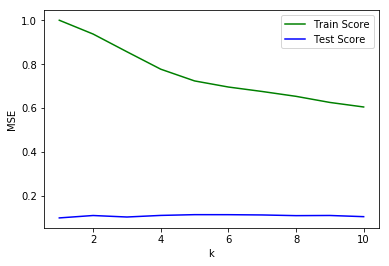

In [379]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,11):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train_reduced, y_train)
    train_score_array.append(knn_reg.score(X_train_reduced, y_train))
    test_score_array.append(knn_reg.score(X_test_reduced, y_test))

x_axis = range(1,11)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [385]:
knn = KNeighborsRegressor(3)
knn.fit(X_train_reduced, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train_reduced, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test_reduced, y_test)))

Train score: 0.8566
Test score: 0.1045


In [386]:
scores = cross_val_score(knn, X_train_reduced, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.64255328 0.60612589 0.46814685 0.50728199 0.94736447]
Average cross-validation score: 0.63


In [387]:
scores = cross_val_score(knn, X_test_reduced, y_test, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [-0.12727009  0.3660201   0.27234442  0.13600459  0.79685333]
Average cross-validation score: 0.29


In [388]:
scores = cross_val_score(knn, X_train_reduced, y_train, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ -50.82703057 -162.88517825 -304.14952831  -24.70323332  -11.50014711]
Average cross-validation score: -110.81


In [389]:
scores = cross_val_score(knn, X_test_reduced, y_test, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [-1.05327972e+02 -8.73395140e+02 -2.85937998e+02 -1.98284810e+04
 -1.30753778e+01]
Average cross-validation score: -4221.24


## PCA for Linear Regression

In [390]:
lreg = LinearRegression()
lreg.fit(X_train_reduced, y_train)
print(lreg.score(X_train_reduced, y_train))
print(lreg.score(X_test_reduced, y_test))


0.5234829050177192
0.18689346193755518


In [392]:
lreg = LinearRegression()
lreg.fit(X_train_reduced, y_train)
scores = cross_val_score(lreg, X_train_reduced, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 0.58440063  0.48270446  0.36065409 -0.45351212  0.76436954]
Average cross-validation score: 0.35


In [393]:
scores = cross_val_score(lreg, X_test_reduced, y_test, cv=5, scoring='r2')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))


Cross-validation scores: [-15.86805554   0.32116166  -0.2177553    0.26086205  -4.63879805]
Average cross-validation score: -4.03


In [394]:
scores = cross_val_score(lreg, X_train_reduced, y_train, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ -59.09602948 -213.92565429 -365.62114783  -72.87423675  -51.48205183]
Average cross-validation score: -152.60


In [395]:
scores = cross_val_score(lreg, X_test_reduced, y_test, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ -1576.0890742    -935.19384801   -478.52654353 -16963.03315209
   -362.93685888]
Average cross-validation score: -4063.16


## PCA for Ridge Regression

In [396]:
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
         
grid = GridSearchCV(ridge, param_grid, cv=5, return_train_score=True)

grid.fit(X_train_reduced, y_train)

print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.45


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


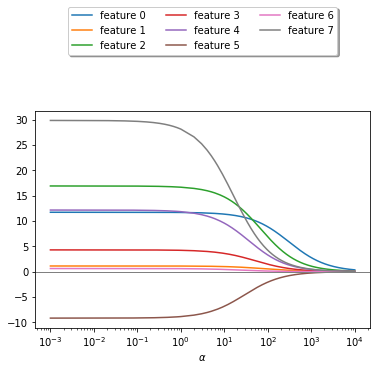

In [399]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_reduced,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,8):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [405]:
ridge = Ridge(alpha = 10)
ridge.fit(X_train_reduced,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train_reduced,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test_reduced, y_test)))

Train score: 0.5058
Test score: 0.1568


In [407]:
ridge = Ridge(alpha=10)
scores = cross_val_score(ridge, X_train_reduced, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.62643381 0.44417042 0.3488842  0.17874126 0.66857368]
Average cross-validation score: 0.45


In [408]:
scores = cross_val_score(ridge, X_test_reduced, y_test, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [-8.87370027  0.53029644 -0.36418165  0.12592281 -4.38525188]
Average cross-validation score: -2.59


In [409]:
scores = cross_val_score(ridge, X_train_reduced, y_train, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ -53.11913423 -229.86126152 -372.3519615   -41.17516688  -72.41214572]
Average cross-validation score: -153.78


In [410]:
scores = cross_val_score(ridge, X_test_reduced, y_test, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [  -922.56224049   -647.08171604   -536.0659335  -20059.85544212
   -346.61755611]
Average cross-validation score: -4502.44


## PCA for LASSO

In [411]:
lasso = Lasso(random_state=0)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lasso, param_grid, cv=5, return_train_score=True)

grid.fit(X_train_reduced, y_train)

print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))


Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.39


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5, 0, '$\\alpha$')

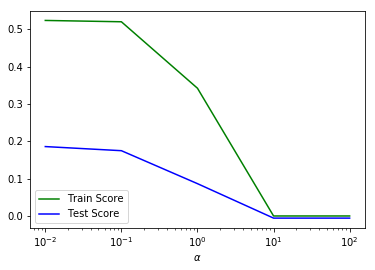

In [412]:
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_reduced,y_train)
    train_score_list.append(lasso.score(X_train_reduced,y_train))
    test_score_list.append(lasso.score(X_test_reduced, y_test))

plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

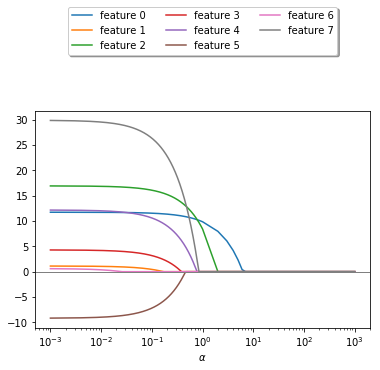

In [413]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_reduced,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,8):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [414]:
lasso = Lasso(alpha=0.1)
scores = cross_val_score(lasso, X_train_reduced, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 0.61070999  0.48570835  0.34899651 -0.21144912  0.7379997 ]
Average cross-validation score: 0.39


In [415]:
scores = cross_val_score(lasso, X_test_reduced, y_test, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [-15.39241856   0.34303778  -0.20502497   0.2438655   -4.03452741]
Average cross-validation score: -3.81


In [416]:
scores = cross_val_score(lasso, X_train_reduced, y_train, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ -55.3549773  -212.68340465 -372.28773492  -60.73800739  -57.24350495]
Average cross-validation score: -151.66


In [417]:
scores = cross_val_score(lasso, X_test_reduced, y_test, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ -1531.64730433   -905.05647178   -473.52406228 -17353.09974847
   -324.04344783]
Average cross-validation score: -4117.47


## PCA for Polynomial Regression

In [418]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(4), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}

poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=10, scoring='neg_mean_squared_error')

poly_grid.fit(X_train_reduced, y_train)
print("Best parameters: {}".format(poly_grid.best_params_))
print("Best cross-validation score: {:.2f}".format(poly_grid.best_score_))

Best parameters: {'linearregression__fit_intercept': False, 'linearregression__normalize': True, 'polynomialfeatures__degree': 2}
Best cross-validation score: -146.27


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [419]:
poly = PolynomialRegression(2)
scores = cross_val_score(poly, X_train_reduced, y_train, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 0.38899248  0.70009229  0.67194746  0.55046234  0.50336301  0.02047195
 -3.33929419 -0.56819722  0.51815371  0.78727195]
Average cross-validation score: 0.02


In [420]:
scores = cross_val_score(poly, X_test_reduced, y_test, cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [-2.55283021e+00 -1.85213939e+00 -3.29973893e+00  4.26258443e-01
 -2.95413773e+00  7.37735405e-02 -2.46922177e+01 -1.44206546e+01
 -2.53740306e+02 -1.71658658e-01]
Average cross-validation score: -30.32


In [421]:
scores = cross_val_score(poly, X_train_reduced, y_train, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ -59.73806433 -200.96819773 -294.64613719 -183.41203778 -133.40239403]
Average cross-validation score: -174.43


In [422]:
scores = cross_val_score(poly, X_test_reduced, y_test, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [  -2051.02986257  -14756.22756965    -396.50456286 -324295.66718688
    -740.4771876 ]
Average cross-validation score: -68447.98


## PCA for SVM

In [423]:
param_grid = {
    'kernel':['rbf','poly'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.01,0.1,1,10]
}
ksvr=SVR()
grid = GridSearchCV(ksvr, param_grid, cv=5,return_train_score=True)

grid.fit(X_train_reduced, y_train)

print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters: {'C': 1, 'gamma': 1, 'kernel': 'poly'}
Best cross-validation score: 0.65


In [424]:
svr = SVR(C=1, gamma=1, kernel= 'poly')
scores = cross_val_score(svr, X_train_reduced, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.81138781 0.6689431  0.40450452 0.43885951 0.92477665]
Average cross-validation score: 0.65


In [425]:
scores = cross_val_score(svr, X_test_reduced, y_test, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ 0.44450819  0.75725666  0.23570087  0.61624342 -0.57291259]
Average cross-validation score: 0.30


In [426]:
scores = cross_val_score(svr, X_train_reduced, y_train, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ -26.81965445 -136.90735487 -340.54451062  -28.13370737  -16.43527887]
Average cross-validation score: -109.77


In [427]:
scores = cross_val_score(svr, X_test_reduced, y_test, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [  -51.90311154  -334.41257666  -300.33736863 -8807.11858307
  -101.23929798]
Average cross-validation score: -1919.00


## PCA for SVM regressor

In [428]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
svr=SVR() 
grid = GridSearchCV(svr, param_grid, cv=5,return_train_score=True)
grid.fit(X_train_reduced, y_train)
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

Best parameters: {'C': 100}
Best cross-validation score: 0.60


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [429]:
svr =SVR(C=100)
scores = cross_val_score(svr, X_train_reduced, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

Cross-validation scores: [0.77967056 0.55976238 0.35935683 0.53159408 0.7838718 ]
Average cross-validation score: 0.60


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [430]:
scores = cross_val_score(svr, X_test_reduced, y_test, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Cross-validation scores: [0.6289081  0.44980265 0.28155027 0.07802945 0.37848622]
Average cross-validation score: 0.36


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

In [431]:
scores = cross_val_score(svr, X_train_reduced, y_train, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [ -31.32967904 -182.05863595 -366.36300812  -23.48430655  -47.22107446]
Average cross-validation score: -130.09


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

In [432]:
scores = cross_val_score(svr, X_test_reduced, y_test, cv=5,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [   -34.67346245   -757.9730614    -282.32048545 -21158.99621985
    -40.00325219]
Average cross-validation score: -4454.79


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

## PCA with SGD Regressor

In [433]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train_reduced, y_train)
print(sgd_reg.score(X_train_reduced, y_train))
print(sgd_reg.score(X_test_reduced, y_test))

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


0.523481596589386
0.18664316014437043


In [434]:
sgd_reg.coef_

array([11.71888047,  1.1144555 , 16.90050951,  4.28774745, 12.14248292,
       -9.15839883,  0.61370683, 29.74925573])

In [435]:
sgd_reg.intercept_

array([5.82113552])

In [436]:
sgd_reg.n_iter_

100000

# Classification


## Loading Libraries

In [168]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns



In [130]:
audit = pd.read_csv('C:/Users/saksh/Downloads/audit_risk.csv')
trail = pd.read_csv('C:/Users/saksh/Downloads/trial.csv')

In [131]:
col=['Sector_score','LOCATION_ID','PARA_A', 'PARA_B','TOTAL', 'numbers','Money_Value','History','Score','Risk']
trail.drop(col,axis=1,inplace=True)
merged=pd.concat([audit, trail], axis=1)

In [132]:
merged.shape

(776, 35)

In [133]:
merged.columns


Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'SCORE_A', 'SCORE_B', 'Marks',
       'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 'History_score'],
      dtype='object')

In [134]:
merged.LOCATION_ID.unique()
merged.LOCATION_ID.value_counts()

8          76
19         68
9          53
16         52
12         47
5          44
2          41
4          37
13         35
15         35
6          33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
37         10
39          9
27          8
28          8
21          8
43          7
25          6
20          5
36          4
30          4
7           4
38          4
3           3
40          3
35          2
NUH         1
41          1
44          1
LOHARU      1
23          1
SAFIDON     1
24          1
34          1
42          1
33          1
17          1
Name: LOCATION_ID, dtype: int64

In [135]:
merged.replace(['SAFIDON', 'LOHARU', 'NUH'], [45,46,47],inplace=True)

In [136]:
merged.LOCATION_ID.value_counts()

8     76
19    68
9     53
16    52
12    47
5     44
2     41
4     37
13    35
15    35
6     33
32    29
11    26
22    24
29    21
14    20
18    16
31    12
1     11
37    10
39     9
21     8
28     8
27     8
43     7
25     6
20     5
36     4
30     4
7      4
38     4
3      3
40     3
35     2
41     1
47     1
45     1
44     1
46     1
23     1
24     1
34     1
42     1
33     1
17     1
Name: LOCATION_ID, dtype: int64

In [137]:
merged.LOCATION_ID.unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 46, 47, 45, '43', '44', '17'],
      dtype=object)

In [138]:
merged.LOCATION_ID = pd.to_numeric(merged.LOCATION_ID)

In [139]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 35 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null int64
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CONT

In [140]:
merged.columns[merged.isnull().any()]

Index(['Money_Value'], dtype='object')

In [141]:
merged.Money_Value.unique()

array([3.3800e+00, 9.4000e-01, 0.0000e+00, 1.1750e+01, 2.9500e+00,
       4.4950e+01, 7.7900e+00, 7.3400e+00, 1.9300e+00, 4.4200e+00,
       9.6000e-01, 1.0430e+01, 7.0000e-03, 9.0000e+00, 4.1280e+01,
       1.4030e+01, 6.3180e+01, 3.4240e+01, 1.0000e-02, 2.0519e+02,
       1.0000e-01, 1.1160e+01, 1.2500e+00, 1.4600e+00, 6.7800e+00,
       1.1600e+00, 1.5241e+02, 1.0800e+00, 2.8400e+00, 9.0000e-01,
       9.6700e+00, 3.2680e+01, 9.3503e+02, 2.9630e+01, 1.1000e-01,
       2.6200e+00, 6.0000e-02, 2.4300e+00, 1.2613e+02, 2.0790e+01,
       1.5692e+02, 1.2290e+01, 2.2900e+00, 7.7800e+00, 2.5100e+00,
       8.3100e+00, 1.6000e-01, 4.7900e+01, 8.9100e+00, 4.9500e+00,
       1.7500e+00, 6.8000e-01, 1.5820e+01, 5.8000e-01, 2.1531e+02,
       5.0000e-02, 5.3340e+01, 1.0690e+01, 5.6900e+00, 1.3500e+00,
       1.1690e+01, 1.4600e+01, 2.0780e+01, 1.0222e+02, 7.4000e-01,
       8.7337e+02, 1.4000e+00, 4.2000e-01, 3.6520e+01, 6.0200e+00,
       1.7160e+01, 1.2910e+01, 1.0790e+01, 3.4600e+00, 2.3300e

In [142]:
merged = merged.dropna()

In [143]:
merged.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Audit_Risk,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,1.7148,1,6,2,2,2,2,0,2,2
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.5108,0,2,2,2,2,2,0,2,2
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.3096,0,2,2,2,2,2,0,2,2
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,3.5060,1,2,6,6,6,2,0,2,2
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.2832,0,2,2,2,2,2,0,2,2


## Feature Selection using correlation matrix

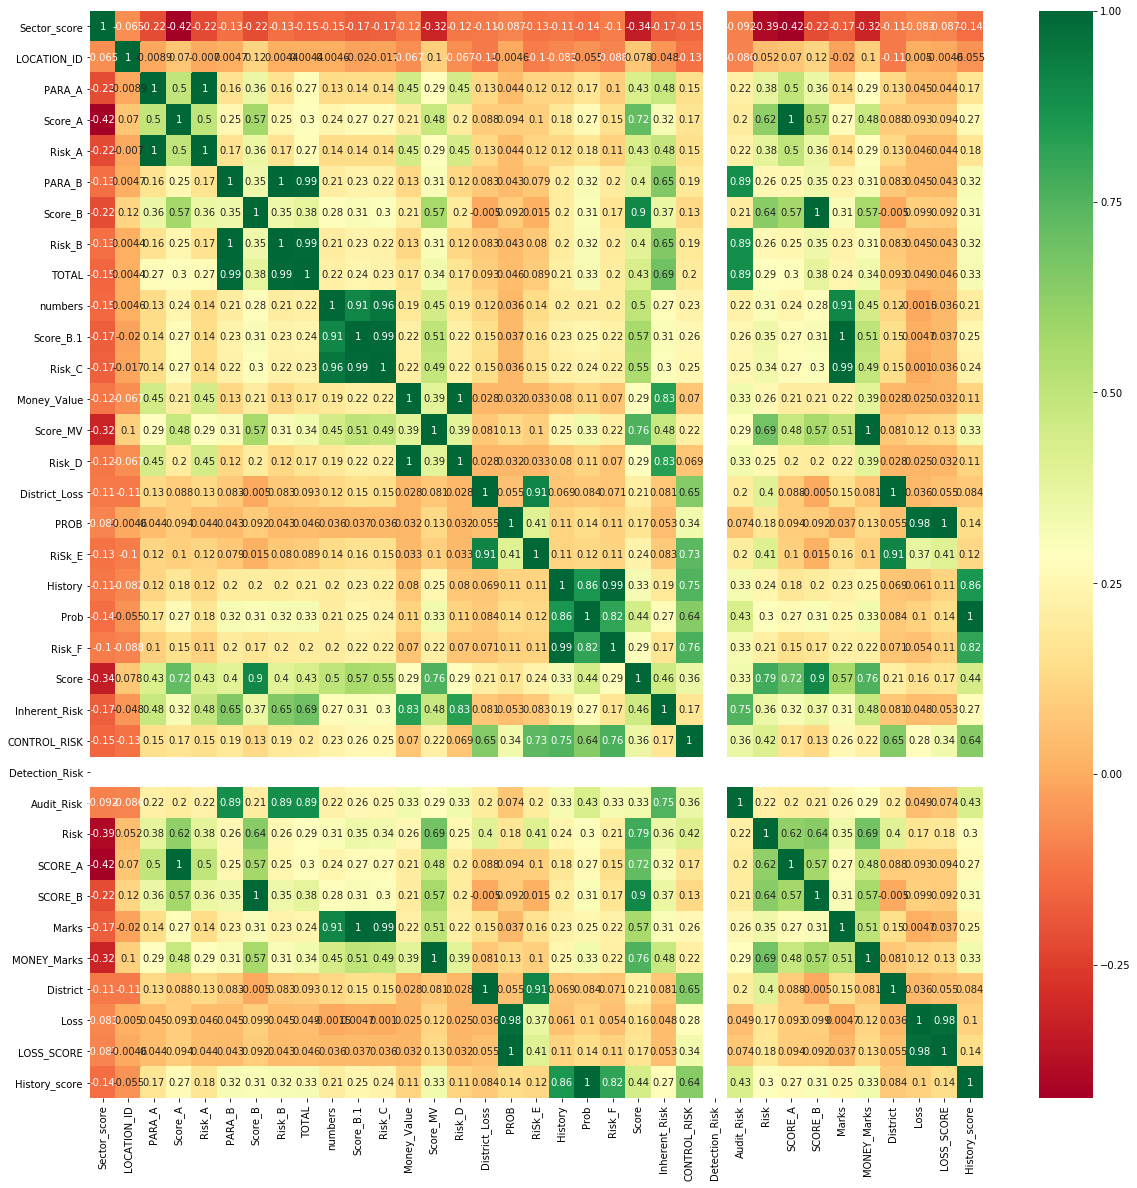

In [99]:
#get correlations of each features in dataset
corrmat = merged.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merged[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Drop Highly Correlated Features

### Identify Highly Correlated Features, i.e features with correlation greater than 0.95

In [144]:
# Create correlation matrix
corr_matrix = merged.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

#list of columns to be dropped
print(to_drop)


['Risk_A', 'Risk_B', 'TOTAL', 'Risk_C', 'Risk_D', 'Risk_F', 'SCORE_A', 'SCORE_B', 'Marks', 'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 'History_score']


### Drop Marked Features

In [145]:
# Drop features 
merged=merged.drop(to_drop, axis=1)

In [146]:
merged.shape

(775, 21)

In [147]:
merged.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'numbers', 'Score_B.1', 'Money_Value', 'Score_MV', 'District_Loss',
       'PROB', 'RiSk_E', 'History', 'Prob', 'Score', 'Inherent_Risk',
       'CONTROL_RISK', 'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

### Drop Audit Risk column for classification task to avoid data leak

In [153]:
X = merged.drop(['Audit_Risk','Risk'],axis=1)
y = merged.Risk


In [156]:
X.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,PARA_B,Score_B,numbers,Score_B.1,Money_Value,Score_MV,District_Loss,PROB,RiSk_E,History,Prob,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk
0,3.89,23,4.18,0.6,2.50,0.2,5.0,0.2,3.38,0.2,2,0.2,0.4,0,0.2,2.4,8.574,0.4,0.5
1,3.89,6,0.00,0.2,4.83,0.2,5.0,0.2,0.94,0.2,2,0.2,0.4,0,0.2,2.0,2.554,0.4,0.5
2,3.89,6,0.51,0.2,0.23,0.2,5.0,0.2,0.00,0.2,2,0.2,0.4,0,0.2,2.0,1.548,0.4,0.5
3,3.89,6,0.00,0.2,10.80,0.6,6.0,0.6,11.75,0.6,2,0.2,0.4,0,0.2,4.4,17.530,0.4,0.5
4,3.89,6,0.00,0.2,0.08,0.2,5.0,0.2,0.00,0.2,2,0.2,0.4,0,0.2,2.0,1.416,0.4,0.5


In [157]:
X.shape

(775, 19)

In [158]:
y.shape

(775,)

### Checking Data Imbalance in target variable

In [159]:
y.value_counts()

0    470
1    305
Name: Risk, dtype: int64

## Ratio of Label 1 to Label 0

In [160]:
305/470

0.648936170212766

## Splitting and Scaling

In [161]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [162]:
scaler = MinMaxScaler()

In [163]:
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [164]:
X_test

array([[2.41379310e-03, 2.50000000e-01, 5.05882353e-03, ...,
        1.32112938e-02, 0.00000000e+00, 0.00000000e+00],
       [9.26206897e-01, 3.40909091e-01, 2.84705882e-02, ...,
        9.80628800e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.09090909e-01, 1.07529412e-01, ...,
        1.08973059e-02, 1.48148148e-01, 0.00000000e+00],
       ...,
       [2.41379310e-03, 1.13636364e-01, 1.40000000e-02, ...,
        7.65965390e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.27272727e-01, 1.17882353e-01, ...,
        1.01184672e-02, 0.00000000e+00, 0.00000000e+00],
       [8.96551724e-03, 1.81818182e-01, 1.96470588e-02, ...,
        1.66066446e-03, 0.00000000e+00, 0.00000000e+00]])

In [165]:
X_train

array([[2.68965517e-02, 3.40909091e-01, 1.49176471e-01, ...,
        6.52293551e-02, 0.00000000e+00, 0.00000000e+00],
       [2.41379310e-03, 1.13636364e-01, 1.05882353e-02, ...,
        9.17227463e-04, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.36363636e-01, 3.52941176e-04, ...,
        4.02292747e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.26206897e-01, 8.18181818e-01, 5.76470588e-03, ...,
        4.77280115e-03, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.81818182e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.26206897e-01, 2.27272727e-01, 1.15294118e-02, ...,
        3.15397514e-04, 0.00000000e+00, 0.00000000e+00]])

In [166]:
X_train.shape

(581, 19)

## KNeighborsClassifier

In [169]:
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy') 
    k_scores.append(scores.mean())
k_scores

[0.9618813251714909,
 0.956707886021307,
 0.9585519907307722,
 0.9394634306397203,
 0.9498697796507635,
 0.9413065099921047,
 0.9412470392814296,
 0.9361028228080428,
 0.9396115947378674,
 0.943120366667692,
 0.9430003998892614,
 0.9377977380622801,
 0.951623140258595,
 0.9411875685707546,
 0.9429117065017891,
 0.9412167912475518,
 0.9429409291785863,
 0.9429711772124643,
 0.9481153936858512,
 0.9463610077209388,
 0.9498395316168855,
 0.9480851456519733,
 0.9498395316168857,
 0.9481153936858512,
 0.9481153936858512,
 0.9481153936858512,
 0.9498395316168857,
 0.9498103089400886,
 0.9515344468711229,
 0.946390230397736]

Text(0, 0.5, 'Cross Validated Accuracy')

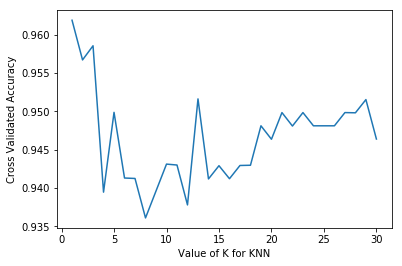

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validated Accuracy')

In [171]:
knn = KNeighborsClassifier()
score = cross_val_score(knn, X_train,y_train, cv=10, scoring= 'accuracy').mean()
score

0.9498697796507635

In [172]:
import numpy as np
import pandas as pd
k_range = list(range(1,31))

param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid.fit(X_train,y_train)
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'n_neighbors': 1}
Best cross-validation score: 0.96


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Verifying grid search result with the for loop and plot

In [173]:
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

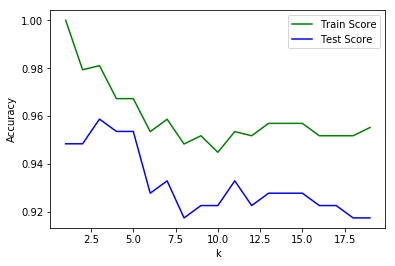

In [174]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [175]:
knn = KNeighborsClassifier(1)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 1.0000
Test score: 0.9485


In [176]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid.cv_results_)
# show the first 5 rows
display(results)

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.000000,0.000000,0.003127,0.006254,1,{'n_neighbors': 1},0.983051,0.966102,1.000000,0.949153,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000000,0.000000,0.003124,0.006248,2,{'n_neighbors': 2},0.983051,0.966102,0.983051,0.949153,...,0.977011,0.982759,0.978967,0.975143,0.975143,0.977099,0.977099,0.979008,0.978200,0.002282
2,0.000783,0.002348,0.006588,0.007441,3,{'n_neighbors': 3},0.966102,0.966102,1.000000,0.932203,...,0.977011,0.980843,0.982792,0.973231,0.978967,0.979008,0.980916,0.984733,0.979919,0.002998
3,0.004791,0.007099,0.001776,0.004645,4,{'n_neighbors': 4},0.983051,0.949153,0.966102,0.932203,...,0.961686,0.961686,0.965583,0.959847,0.961759,0.971374,0.971374,0.954198,0.963663,0.004916
4,0.000470,0.001410,0.003355,0.006170,5,{'n_neighbors': 5},0.983051,0.949153,0.983051,0.932203,...,0.961686,0.963602,0.965583,0.957935,0.963671,0.971374,0.973282,0.959924,0.964618,0.004480
5,0.000000,0.000000,0.004687,0.007160,6,{'n_neighbors': 6},0.966102,0.932203,0.966102,0.932203,...,0.952107,0.954023,0.954111,0.950287,0.948375,0.956107,0.961832,0.950382,0.952761,0.003762
6,0.000000,0.000000,0.001564,0.004692,7,{'n_neighbors': 7},0.966102,0.932203,0.983051,0.932203,...,0.955939,0.959770,0.956023,0.954111,0.956023,0.958015,0.961832,0.954198,0.956779,0.002303
7,0.000000,0.000000,0.006249,0.007653,8,{'n_neighbors': 8},0.966102,0.932203,0.966102,0.915254,...,0.944444,0.950192,0.948375,0.944551,0.948375,0.950382,0.954198,0.946565,0.947980,0.002975
8,0.000000,0.000000,0.004681,0.007151,9,{'n_neighbors': 9},0.966102,0.932203,0.966102,0.915254,...,0.946360,0.954023,0.950287,0.948375,0.950287,0.954198,0.956107,0.956107,0.951421,0.003275
9,0.001562,0.004686,0.003125,0.006249,10,{'n_neighbors': 10},0.966102,0.932203,0.966102,0.915254,...,0.944444,0.950192,0.942639,0.946463,0.944551,0.959924,0.954198,0.950382,0.947977,0.005379


In [177]:
print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")

y_true, y_pred = y_test, knn.predict(X_test)
print(classification_report(y_true, y_pred))

Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       116
           1       0.97      0.90      0.93        78

   micro avg       0.95      0.95      0.95       194
   macro avg       0.95      0.94      0.95       194
weighted avg       0.95      0.95      0.95       194



In [178]:
from sklearn.metrics import confusion_matrix
print("KNN Classifier \nConfusion matrix:")
print(confusion_matrix(y_test,knn.predict(X_test) ))

KNN Classifier 
Confusion matrix:
[[114   2]
 [  8  70]]


## Logistic Regression

In [179]:
logreg=LogisticRegression()

## Grid Search to find the best paramter "penalty" & "C"

In [180]:
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty": ["l1","l2"] }
logreg_cv=GridSearchCV(logreg,param_grid,cv=10)
logreg_cv.fit(X_train,y_train)
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\pyt

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\pyt

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\pyt

tuned hyperparameters :(best parameters)  {'C': 1000, 'penalty': 'l1'}
accuracy : 0.9896729776247849


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Running model with best parameter

In [181]:
logreg2=LogisticRegression(C=1000,penalty="l1")
logreg2.fit(X_train,y_train)
print("train score",logreg2.score(X_train,y_train))
print("test score",logreg2.score(X_test,y_test))

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train score 0.9982788296041308
test score 0.9845360824742269


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [182]:
print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")

y_true, y_pred = y_test, logreg2.predict(X_test)
print(classification_report(y_true, y_pred))

Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       116
           1       0.99      0.97      0.98        78

   micro avg       0.98      0.98      0.98       194
   macro avg       0.98      0.98      0.98       194
weighted avg       0.98      0.98      0.98       194



In [183]:
from sklearn.metrics import confusion_matrix
print("Logistic Regression \nConfusion matrix:")
print(confusion_matrix(y_test,logreg2.predict(X_test) ))

Logistic Regression 
Confusion matrix:
[[115   1]
 [  2  76]]


## SVC with kernel "rbf" & "poly"

In [184]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.01,0.1,1,10],
                     'C': [0.01, 0.1, 1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'degree': [1,2,3,4],
                     'C': [0.01, 0.1, 1, 10, 100, 1000]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=10)
clf.fit(X_train, y_train)
print("tuned hyperparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

tuned hyperparameters :(best parameters)  {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy : 0.9759036144578314


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

In [185]:
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Grid scores on development set:

0.609 (+/-0.008) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
0.609 (+/-0.008) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.814 (+/-0.070) for {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}
0.609 (+/-0.008) for {'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}
0.613 (+/-0.014) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.916 (+/-0.064) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.960 (+/-0.061) for {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.890 (+/-0.071) for {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
0.914 (+/-0.063) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.954 (+/-0.065) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.967 (+/-0.048) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.952 (+/-0.049) for {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
0.952 (+/-0.060) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.971 (+/-0.038) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.971 (+/-0.041) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.957 (+/-0.057) for {'C': 10, 'gamm

## Detailed classification report

In [186]:
ksvc=SVC(C=1000,kernel="rbf",gamma=0.1)
ksvc.fit(X_train,y_train)
print("train score",ksvc.score(X_train,y_train))
print("test score",ksvc.score(X_test,y_test))

train score 0.9879518072289156
test score 0.979381443298969


In [187]:
print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")

y_true, y_pred = y_test, ksvc.predict(X_test)
print(classification_report(y_true, y_pred))


Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       116
           1       1.00      0.95      0.97        78

   micro avg       0.98      0.98      0.98       194
   macro avg       0.98      0.97      0.98       194
weighted avg       0.98      0.98      0.98       194



gamma = 10.00  accuracy = 0.96  AUC = 0.99
gamma = 1.00  accuracy = 0.96  AUC = 1.00
gamma = 0.10  accuracy = 0.95  AUC = 0.99
gamma = 0.01  accuracy = 0.87  AUC = 1.00


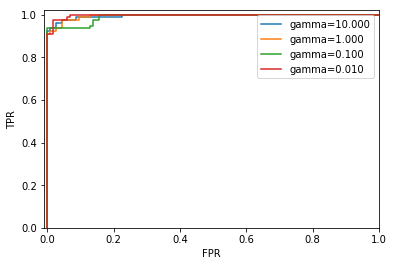

In [188]:
%matplotlib notebook

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
plt.switch_backend("TkAgg")
plt.figure()
for gamma in [10,1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
    	gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

## Linear SVC with tunning paramter C

In [189]:
tuned_parameters = {'kernel': ['linear'],
                     'C': [0.01, 0.1, 1, 10, 100, 1000]}

clf = GridSearchCV(SVC(), tuned_parameters, cv=10)
clf.fit(X_train, y_train)
print("tuned hyperparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1000, 'kernel': 'linear'}
accuracy : 0.9845094664371773


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [190]:
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Grid scores on development set:

0.890 (+/-0.048) for {'C': 0.01, 'kernel': 'linear'}
0.938 (+/-0.086) for {'C': 0.1, 'kernel': 'linear'}
0.959 (+/-0.055) for {'C': 1, 'kernel': 'linear'}
0.957 (+/-0.053) for {'C': 10, 'kernel': 'linear'}
0.971 (+/-0.054) for {'C': 100, 'kernel': 'linear'}
0.985 (+/-0.033) for {'C': 1000, 'kernel': 'linear'}


In [191]:
lsvc=SVC(C=1000,kernel="linear")
lsvc.fit(X_train,y_train)
print("train score",lsvc.score(X_train,y_train))
print("test score",lsvc.score(X_test,y_test))

train score 0.9931153184165232
test score 0.9948453608247423


In [192]:
print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")

y_true, y_pred = y_test, lsvc.predict(X_test)
print(classification_report(y_true, y_pred))

Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       116
           1       1.00      0.99      0.99        78

   micro avg       0.99      0.99      0.99       194
   macro avg       1.00      0.99      0.99       194
weighted avg       0.99      0.99      0.99       194



In [193]:
from sklearn import metrics
print(metrics.precision_score(y_test,lsvc.predict(X_test)))

1.0


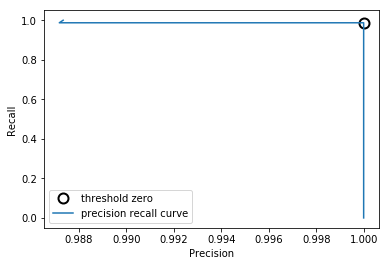

In [194]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, lsvc.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

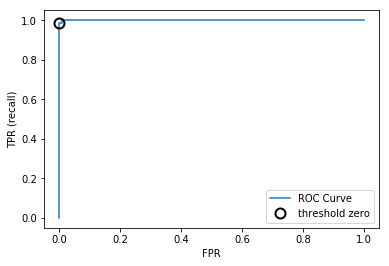

In [195]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lsvc.decision_function(X_test))
plt.switch_backend("TkAgg")
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

## DecisionTreeClassifier

In [196]:
param_grid = {'max_depth': np.arange(3, 10)}
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(X_train, y_train)
print("tuned hyperparameters :(best parameters) ",tree.best_params_)
print("accuracy :",tree.best_score_)
tree_preds = tree.predict_proba(X_test)[:, 1]
tree_performance = roc_auc_score(y_test, tree_preds)
print ('DecisionTree: Area under the ROC curve = {}'.format(tree_performance))

tuned hyperparameters :(best parameters)  {'max_depth': 6}
accuracy : 1.0
DecisionTree: Area under the ROC curve = 0.9807692307692308


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [197]:
dtree=DecisionTreeClassifier(max_depth=6)
dtree.fit(X_train,y_train)
print("Train score",dtree.score(X_train,y_train))
print("Test score",dtree.score(X_test,y_test))


Train score 1.0
Test score 0.9845360824742269


## Feature importance graph via decision tree

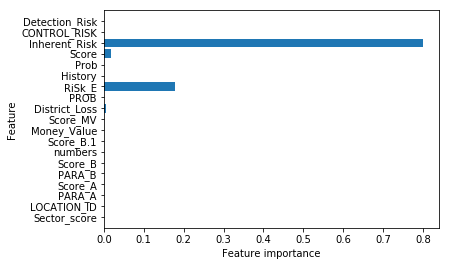

In [199]:
feature_cols =['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'numbers', 'Score_B.1', 'Money_Value', 'Score_MV', 'District_Loss',
       'PROB', 'RiSk_E', 'History', 'Prob', 'Score', 'Inherent_Risk',
       'CONTROL_RISK', 'Detection_Risk']
def plot_feature_importances_cancer(model):
    n_features = X_train.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_cols)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(dtree)

In [200]:
print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")

y_true, y_pred = y_test, dtree.predict(X_test)
print(classification_report(y_true, y_pred))

Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       116
           1       1.00      0.96      0.98        78

   micro avg       0.98      0.98      0.98       194
   macro avg       0.99      0.98      0.98       194
weighted avg       0.98      0.98      0.98       194



In [201]:
from sklearn import metrics
print(metrics.recall_score(y_test,dtree.predict(X_test)))

0.9615384615384616


In [202]:
from sklearn.metrics import confusion_matrix
print("Decision Tree \nConfusion matrix:")
print(confusion_matrix(y_test,dtree.predict(X_test) ))

Decision Tree 
Confusion matrix:
[[116   0]
 [  3  75]]


### As it is a case of Fraud Firm classification, and the Target column is Risk 
### So, False positives are more acceptable than false negatives, so for this classification problem we will optimize for "Sensitivity" or "Recall".
### From the train and the test score Linear SVC is performing the best.


# Voting Classifier

In [203]:
from sklearn.ensemble import VotingClassifier

## Soft Voting

In [216]:
voting_clf = VotingClassifier(estimators=[('lr', logreg2), ('knn', knn),('decision_tree',dtree)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (logreg2, knn,dtree,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\saksh\appdata\local\programs\python\python3

LogisticRegression 0.9845360824742269
KNeighborsClassifier 0.9484536082474226
DecisionTreeClassifier 0.9845360824742269
VotingClassifier 0.9896907216494846


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Hard Voting

In [217]:
voting_clf = VotingClassifier(estimators=[('lr', logreg2), ('knn', knn),('decision_tree',dtree)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (logreg2, knn,dtree,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\saksh\appdata\local\programs\python\python3

LogisticRegression 0.9845360824742269
KNeighborsClassifier 0.9484536082474226
DecisionTreeClassifier 0.9948453608247423
VotingClassifier 0.9896907216494846


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Bagging

In [218]:
from sklearn.ensemble import BaggingClassifier

### DecisionTree Bagging

In [228]:
dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [229]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9845360824742269


In [230]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.99
Test score: 0.98


In [233]:
dt_clf.fit(X_train, y_train)
y_pred_tree = dt_clf.predict(X_test)
 
print(accuracy_score(y_test, y_pred_tree))

0.9845360824742269


### Linear SVC Bagging

In [237]:
svc=LinearSVC()
bag_clf = BaggingClassifier(svc, n_estimators=500, max_samples=100, bootstrap=True, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [238]:
print(accuracy_score(y_test, y_pred))
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

0.9690721649484536
Train score: 0.97
Test score: 0.97


In [239]:
svc.fit(X_train, y_train)
y_pred_tree = svc.predict(X_test)
 
print(accuracy_score(y_test, y_pred_tree))

0.9690721649484536


## Pasting

### Decision Tree Pasting

In [245]:
dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [246]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9845360824742269


In [247]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.99
Test score: 0.98


In [248]:
dt_clf.fit(X_train, y_train)
y_pred_tree = dt_clf.predict(X_test)
 
print(accuracy_score(y_test, y_pred_tree))

0.9845360824742269


### Linear SVC Pasting

In [249]:
svc=LinearSVC()
bag_clf = BaggingClassifier(svc, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [250]:
print(accuracy_score(y_test, y_pred))
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

0.9690721649484536
Train score: 0.97
Test score: 0.97


In [251]:
svc.fit(X_train, y_train)
y_pred_tree = svc.predict(X_test)
 
print(accuracy_score(y_test, y_pred_tree))

0.9690721649484536


## ADA Boosting

### ADA Boosting on SVC with Kernel trick

In [275]:
from sklearn.ensemble import AdaBoostClassifier
ksvc=SVC(kernel="rbf")
ada_clf = AdaBoostClassifier(ksvc, n_estimators=200, algorithm="SAMME", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [276]:
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.5979381443298969


In [277]:
print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.61
Test score: 0.60


In [278]:
ksvc=SVC(kernel="rbf")
ksvc.fit(X_train, y_train)
y_pred_tree = ksvc.predict(X_test)
 
print(accuracy_score(y_test, y_pred_tree))

0.9587628865979382


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Adaboosting on logistic regression

In [262]:
ada_clf = AdaBoostClassifier(LogisticRegression(), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\pyt

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\pyt

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\pyt

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [268]:
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.9587628865979382


In [267]:
print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.97
Test score: 0.96


In [270]:
lg=LogisticRegression()
lg.fit(X_train, y_train)
y_pred_tree = lg.predict(X_test)
 
print(accuracy_score(y_test, y_pred_tree))

0.9536082474226805


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Gradient Boosting

In [280]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.985


In [282]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.995
Accuracy on test set: 0.985


In [283]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.995
Accuracy on test set: 0.985


## Testing for best learning rate

In [281]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.938
Accuracy score (validation): 0.907

Learning rate:  0.1
Accuracy score (training): 0.993
Accuracy score (validation): 0.979

Learning rate:  0.25
Accuracy score (training): 0.995
Accuracy score (validation): 0.985

Learning rate:  0.5
Accuracy score (training): 0.998
Accuracy score (validation): 0.985

Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.985

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.985



## Confusion matrix and Classification report of Gradient Boosting

In [304]:
# Output confusion matrix and classification report of Gradient Boosting algorithm on validation set

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[116   0]
 [  3  75]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       116
           1       1.00      0.96      0.98        78

   micro avg       0.98      0.98      0.98       194
   macro avg       0.99      0.98      0.98       194
weighted avg       0.98      0.98      0.98       194



## ROC Score and Area-Under-Curve (AUC) of Gradient Boosting

In [297]:
# ROC curve and Area-Under-Curve (AUC)
import numpy as np
y_scores_gb = gb.decision_function(X_test)
fpr_gb, tpr_gb, _= roc_curve(y_test, y_scores_gb)
roc_auc_gb=metrics.auc(fpr_gb, tpr_gb)
roc_score=roc_auc_score(y_test, y_scores_gb)
print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))
print("ROC score: {:.3f}".format(roc_score))

Area under ROC curve = 1.00
ROC score: 0.999


## ROC Plot

<IPython.core.display.Javascript object>


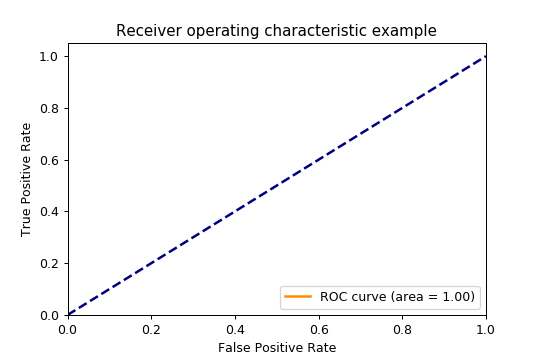

In [303]:
plt.figure()
lw = 2
plt.plot(fpr_gb[2], tpr_gb[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Feature importances

<IPython.core.display.Javascript object>


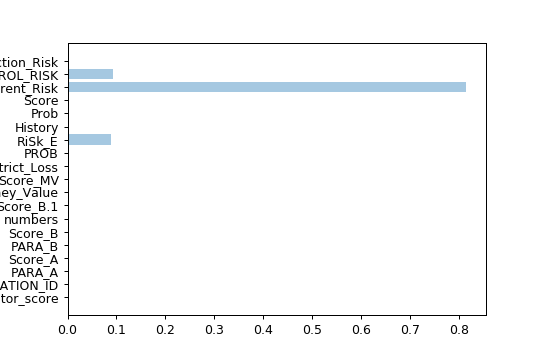

([<matplotlib.axis.YTick at 0x101a1d50>,
 <a list of 19 Text yticklabel objects>)

In [306]:
%matplotlib notebook

y_list = gbrt.feature_importances_
y_pos = np.arange(len(y_list))
features = merged.columns
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

## PCA

In [307]:
# The code below has .95 for the number of components parameter. 
# It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.
from sklearn.decomposition import PCA

#create model
pca = PCA(n_components= 0.95, random_state = 0)

#train pca model
pca.fit(X_train)

#transforming X_train and X_test
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)


In [308]:
pca.n_components_

8

In [309]:
pca.explained_variance_

array([0.5318522 , 0.15081615, 0.11764001, 0.08935622, 0.06365536,
       0.05022412, 0.04083783, 0.02830719])

In [310]:
pca.explained_variance_ratio_

array([0.47977612, 0.13604905, 0.10612134, 0.08060695, 0.05742257,
       0.04530645, 0.03683921, 0.02553551])

In [311]:
pca.n_features_

19

### PCA for KNN

In [317]:
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_reduced, y_train, cv=10, scoring='accuracy') 
    k_scores.append(scores.mean())
k_scores


[0.9515939175817978,
 0.9429117065017893,
 0.9361633188757985,
 0.9360141294205707,
 0.9481748643965261,
 0.9396115947378674,
 0.9395521240271923,
 0.9361028228080428,
 0.9396115947378674,
 0.9413962287366575,
 0.9430003998892614,
 0.9430306479231392,
 0.951623140258595,
 0.946390230397736,
 0.946390230397736,
 0.942971177212464,
 0.946449701108411,
 0.9429711772124643,
 0.9463610077209388,
 0.9446660924667014,
 0.9464204784316138,
 0.9446660924667014,
 0.9463610077209388,
 0.9480851456519733,
 0.9515636695479202,
 0.9515636695479202,
 0.9515636695479202,
 0.9481446163626484,
 0.9498395316168857,
 0.9498395316168857]

0.9481748643965261

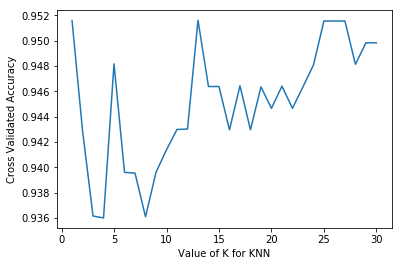

In [318]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validated Accuracy')

knn = KNeighborsClassifier()
score = cross_val_score(knn, X_train_reduced,y_train, cv=10, scoring= 'accuracy').mean()
score

In [319]:
import numpy as np
import pandas as pd
k_range = list(range(1,31))

param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid.fit(X_train_reduced,y_train)
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'n_neighbors': 1}
Best cross-validation score: 0.95


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [324]:
knn = KNeighborsClassifier(1)
knn.fit(X_train_reduced, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train_reduced, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test_reduced, y_test)))


Train score: 1.0000
Test score: 0.9330


In [325]:
print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")

y_true, y_pred = y_test, knn.predict(X_test_reduced)
print(classification_report(y_true, y_pred))

from sklearn.metrics import confusion_matrix
print("KNN Classifier \nConfusion matrix:")
print(confusion_matrix(y_test,knn.predict(X_test_reduced) ))

Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       116
           1       0.96      0.87      0.91        78

   micro avg       0.93      0.93      0.93       194
   macro avg       0.94      0.92      0.93       194
weighted avg       0.93      0.93      0.93       194

KNN Classifier 
Confusion matrix:
[[113   3]
 [ 10  68]]


### PCA for SVC with Kernel Trick

In [313]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.01,0.1,1,10],
                     'C': [0.01, 0.1, 1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'degree': [1,2,3,4],
                     'C': [0.01, 0.1, 1, 10, 100, 1000]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=10)
clf.fit(X_train_reduced, y_train)
print("tuned hyperparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning."

tuned hyperparameters :(best parameters)  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy : 0.9707401032702238


In [314]:
ksvc=SVC(C=100,kernel="rbf",gamma=0.1)
ksvc.fit(X_train_reduced,y_train)
print("train score",ksvc.score(X_train_reduced,y_train))
print("test score",ksvc.score(X_test_reduced,y_test))

train score 0.9707401032702238
test score 0.9639175257731959


In [315]:
print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")

y_true, y_pred = y_test, ksvc.predict(X_test_reduced)
print(classification_report(y_true, y_pred))

Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       116
           1       1.00      0.91      0.95        78

   micro avg       0.96      0.96      0.96       194
   macro avg       0.97      0.96      0.96       194
weighted avg       0.97      0.96      0.96       194



In [316]:
%matplotlib notebook

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
plt.switch_backend("TkAgg")
plt.figure()
for gamma in [10,1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train_reduced, y_train)
    accuracy = svc.score(X_test_reduced, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test_reduced))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test_reduced))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
    	gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

gamma = 10.00  accuracy = 0.96  AUC = 0.99
gamma = 1.00  accuracy = 0.96  AUC = 0.99
gamma = 0.10  accuracy = 0.95  AUC = 0.99
gamma = 0.01  accuracy = 0.88  AUC = 1.00


#### In case of SVC with Kernel trick train and test scores were bit better without PCA

## PCA for Logistic Regression

In [326]:
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty": ["l1","l2"] }
logreg_cv=GridSearchCV(logreg,param_grid,cv=10)
logreg_cv.fit(X_train_reduced,y_train)
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\pyt

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\pyt

tuned hyperparameters :(best parameters)  {'C': 1, 'penalty': 'l2'}
accuracy : 0.9672977624784854


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\saksh\appdata\local\programs\python\pyt

In [327]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train_reduced,y_train)
print("train score",logreg2.score(X_train_reduced,y_train))
print("test score",logreg2.score(X_test_reduced,y_test))


train score 0.9672977624784854
test score 0.9587628865979382


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [328]:
print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")

y_true, y_pred = y_test, logreg2.predict(X_test_reduced)
print(classification_report(y_true, y_pred))

print("Logistic Regression \nConfusion matrix:")
print(confusion_matrix(y_test,logreg2.predict(X_test_reduced) ))

Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       116
           1       1.00      0.90      0.95        78

   micro avg       0.96      0.96      0.96       194
   macro avg       0.97      0.95      0.96       194
weighted avg       0.96      0.96      0.96       194

Logistic Regression 
Confusion matrix:
[[116   0]
 [  8  70]]


## PCA for Linear SVC

In [329]:
tuned_parameters = {'kernel': ['linear'],
                     'C': [0.01, 0.1, 1, 10, 100, 1000]}

clf = GridSearchCV(SVC(), tuned_parameters, cv=10)
clf.fit(X_train_reduced, y_train)
print("tuned hyperparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)


tuned hyperparameters :(best parameters)  {'C': 1, 'kernel': 'linear'}
accuracy : 0.9569707401032702


c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [330]:
lsvc=SVC(C=1000,kernel="linear")
lsvc.fit(X_train_reduced,y_train)
print("train score",lsvc.score(X_train_reduced,y_train))
print("test score",lsvc.score(X_test_reduced,y_test))


train score 0.9672977624784854
test score 0.9690721649484536


In [331]:
print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")

y_true, y_pred = y_test, lsvc.predict(X_test_reduced)
print(classification_report(y_true, y_pred))

Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       116
           1       1.00      0.92      0.96        78

   micro avg       0.97      0.97      0.97       194
   macro avg       0.98      0.96      0.97       194
weighted avg       0.97      0.97      0.97       194



## PCA for Decision Tree classifier

In [332]:
param_grid = {'max_depth': np.arange(3, 10)}
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(X_train_reduced, y_train)
print("tuned hyperparameters :(best parameters) ",tree.best_params_)
print("accuracy :",tree.best_score_)
tree_preds = tree.predict_proba(X_test_reduced)[:, 1]
tree_performance = roc_auc_score(y_test, tree_preds)
print ('DecisionTree: Area under the ROC curve = {}'.format(tree_performance))

c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


tuned hyperparameters :(best parameters)  {'max_depth': 3}
accuracy : 0.9569707401032702
DecisionTree: Area under the ROC curve = 0.9423076923076923


In [333]:
dtree=DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train_reduced,y_train)
print("Train score",dtree.score(X_train_reduced,y_train))
print("Test score",dtree.score(X_test_reduced,y_test))

Train score 0.9690189328743546
Test score 0.9536082474226805


### For all the models after PCA the scores are less in comparison to the models running without PCA .
### With PCA too, Linear SVC gives the best results 

# Deep Learning

In [349]:
import tensorflow as tf
from tensorflow.keras import layers

ImportError: Traceback (most recent call last):
  File "c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 18, in swig_import_helper
    fp, pathname, description = imp.find_module('_pywrap_tensorflow_internal', [dirname(__file__)])
  File "c:\users\saksh\appdata\local\programs\python\python37-32\lib\imp.py", line 296, in find_module
    raise ImportError(_ERR_MSG.format(name), name=name)
ImportError: No module named '_pywrap_tensorflow_internal'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 20, in swig_import_helper
    import _pywrap_tensorflow_internal
ModuleNotFoundError: No module named '_pywrap_tensorflow_internal'


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [350]:
%matplotlib inline
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

np.random.seed(0) # for reproducibility

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 18, in swig_import_helper
    fp, pathname, description = imp.find_module('_pywrap_tensorflow_internal', [dirname(__file__)])
  File "c:\users\saksh\appdata\local\programs\python\python37-32\lib\imp.py", line 296, in find_module
    raise ImportError(_ERR_MSG.format(name), name=name)
ImportError: No module named '_pywrap_tensorflow_internal'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "c:\users\saksh\appdata\local\programs\python\python37-32\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 20, in swig_import_helper
    import _pywrap_tensorflow_internal
ModuleNotFoundError: No module named '_pywrap_tensorflow_internal'


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.